0 899
900
[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900]


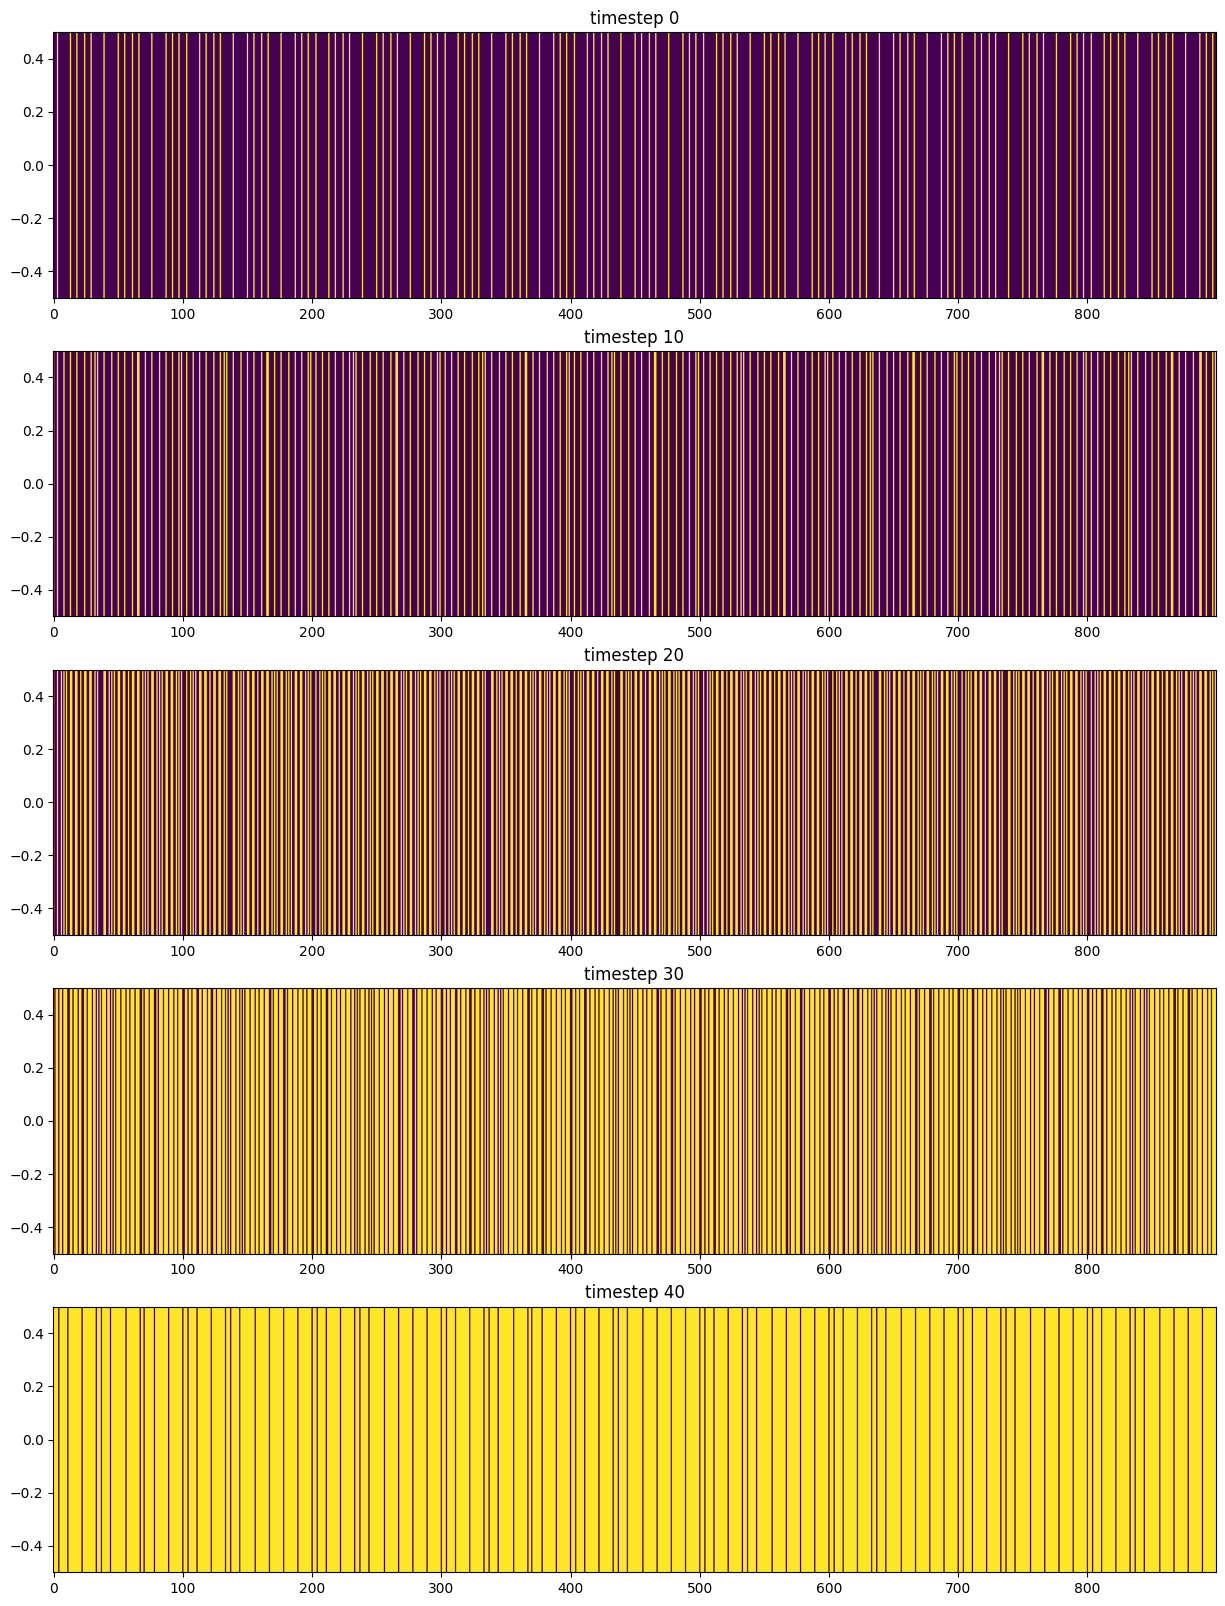

In [22]:
import numpy as np

def halton_sequence(b, size):
    """生成指定大小的Halton序列"""
    n, d = 0, 1
    sequence = []
    while len(sequence) < size:
        x = d - n
        if x == 1:
            n = 1
            d *= b
        else:
            y = d // b
            while x <= y:
                y //= b
            n = (b + 1) * y - x
        sequence.append(n / d)
    return sequence

def discrete_sequence(b, size, lower=0, upper=900):
    """生成离散的Halton序列，映射到指定区间[lower, upper]"""
    halton_vals = halton_sequence(b, size)
    # 将值映射到 [lower, upper] 区间，并转换为整数
    scaled_vals = np.round(np.array(halton_vals) * (upper - lower))
    return scaled_vals.astype(int)

# 设置基数 b，序列大小 size
b = 3  # 基数，通常使用 2 或 3
size = 900  # 序列长度

# 生成离散的Halton序列
discrete_sequence = discrete_sequence(b, size)
print(min(discrete_sequence), max(discrete_sequence))

# 打印生成的离散Halton序列
# print(discrete_sequence)
print(len(discrete_sequence))

# 每20个作为一个序列片段
discrete_sequence_slices = np.array(discrete_sequence).reshape(-1, 20)
# print(discrete_sequence_slices)
# 累加每个序列片段的和
discrete_sequence_slices_aggregate = [[] for i in range(len(discrete_sequence_slices))]
for i in range(len(discrete_sequence_slices)):
    for j in range(i+1):
        discrete_sequence_slices_aggregate[i].extend(discrete_sequence_slices[j])
print([len(i) for i in discrete_sequence_slices_aggregate])
discrete_sequence_slices_aggregate.reverse()

import matplotlib.pyplot as plt
import numpy

def plot_masked_indices(masked_indices_list):
    masked_indices_list = [i for i in masked_indices_list]
    seq_len = 900
    logits = numpy.ones(seq_len)
    logits_list = [logits.copy() for _ in range(len(masked_indices_list))]
    for i in range(len(masked_indices_list)):
        # print(len(masked_indices_list[i]))
        for j in range(len(masked_indices_list[i])):
            logits_list[i][masked_indices_list[i][j]] = 0
    # for i in range(len(logits_list)):
    #     print(f"timestep {i}: {logits_list[i]}")

    step = 10

    # logits_list = [i.reshape(9, 690) for i in logits_list]
    logits_list = [i.reshape(1, 900) for i in logits_list]
    fig, axes = plt.subplots(len(logits_list) // step + 1, 1, figsize=(15, 20))
    for i in range(0, len(logits_list)+1, step):
        idx = i // step
        i = min(i, len(logits_list)-1)
        axes[idx].imshow(logits_list[i], aspect='auto', cmap='viridis', origin='lower')
        axes[idx].set_title(f"timestep {i}")
    plt.show()

plot_masked_indices(discrete_sequence_slices_aggregate)

[300, 600, 100, 400, 700, 200, 500, 800, 33, 333, 633, 133, 433, 733, 233, 533, 833, 66, 366, 666, 166, 466, 766, 266, 566, 866, 11, 311, 611, 111, 411, 711, 211, 511, 811, 44, 344, 644, 144, 444, 744, 244, 544, 844, 77, 377, 677, 177, 477, 777, 277, 577, 877, 22, 322, 622, 122, 422, 722, 222, 522, 822, 55, 355, 655, 155, 455, 755, 255, 555, 855, 88, 388, 688, 188, 488, 788, 288, 588, 888, 3, 303, 603, 103, 403, 703, 203, 503, 803, 37, 337, 637, 137, 437, 737, 237, 537, 837, 70, 370, 670, 170, 470, 770, 270, 570, 870, 14, 314, 614, 114, 414, 714, 214, 514, 814, 48, 348, 648, 148, 448, 748, 248, 548, 848, 81, 381, 681, 181, 481, 781, 281, 581, 881, 25, 325, 625, 125, 425, 725, 225, 525, 825, 59, 359, 659, 159, 459, 759, 259, 559, 859, 92, 392, 692, 192, 492, 792, 292, 592, 892, 7, 307, 607, 107, 407, 707, 207, 507, 807, 40, 340, 640, 140, 440, 740, 240, 540, 840, 74, 374, 674, 174, 474, 774, 274, 574, 874, 18, 318, 618, 118, 418, 718, 218, 518, 818, 51, 351, 651, 151, 451, 751, 251, 551

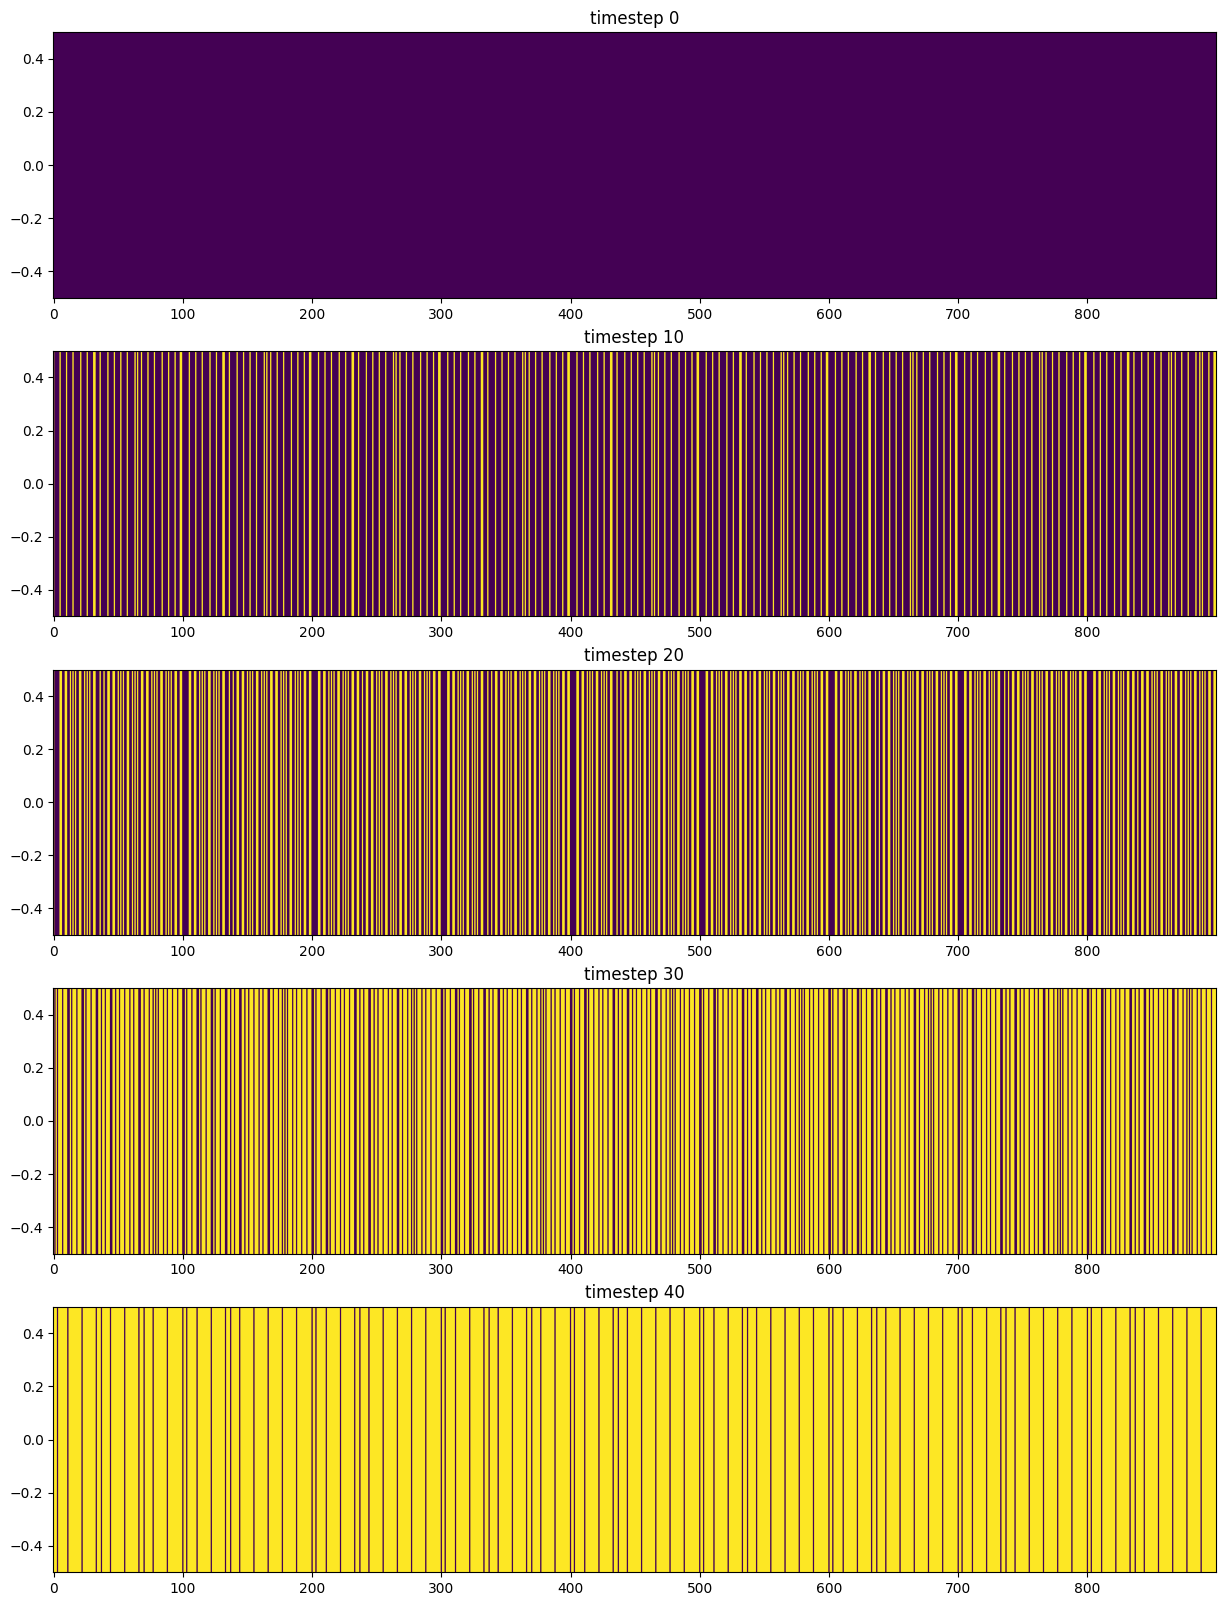

In [10]:
def halton_sequence(b):
    """Generator function for Halton sequence."""
    n, d = 0, 1
    while True:
        x = d - n
        if x == 1:
            n = 1
            d *= b
        else:
            y = d // b
            while x <= y:
                y //= b
            n = (b + 1) * y - x
        yield n / d

seq = halton_sequence(3)
size = 900
min_value = 0
max_value = 900
discrete_sequence = []

while len(discrete_sequence) < size:
    # list.add(int(next(seq) * (max_value - min_value)))
    value_scaled = int(next(seq) * (max_value - min_value))
    if value_scaled not in discrete_sequence:
        discrete_sequence.append(value_scaled) 

print(discrete_sequence)
print(len(discrete_sequence))

# 每20个作为一个序列片段
discrete_sequence_slices = np.array(discrete_sequence).reshape(-1, 20)
# print(discrete_sequence_slices)
# 累加每个序列片段的和
discrete_sequence_slices_aggregate = [[] for i in range(len(discrete_sequence_slices))]
for i in range(len(discrete_sequence_slices)):
    for j in range(i+1):
        discrete_sequence_slices_aggregate[i].extend(discrete_sequence_slices[j])
print([len(i) for i in discrete_sequence_slices_aggregate])
discrete_sequence_slices_aggregate.reverse()

import matplotlib.pyplot as plt
import numpy

def plot_masked_indices(masked_indices_list):
    masked_indices_list = [i for i in masked_indices_list]
    seq_len = 900
    logits = numpy.ones(seq_len)
    logits_list = [logits.copy() for _ in range(len(masked_indices_list))]
    for i in range(len(masked_indices_list)):
        # print(len(masked_indices_list[i]))
        for j in range(len(masked_indices_list[i])):
            logits_list[i][masked_indices_list[i][j]] = 0
    # for i in range(len(logits_list)):
    #     print(f"timestep {i}: {logits_list[i]}")

    step = 10

    # logits_list = [i.reshape(9, 690) for i in logits_list]
    logits_list = [i.reshape(1, 900) for i in logits_list]
    fig, axes = plt.subplots(len(logits_list) // step + 1, 1, figsize=(15, 20))
    for i in range(0, len(logits_list)+1, step):
        idx = i // step
        i = min(i, len(logits_list)-1)
        axes[idx].imshow(logits_list[i], aspect='auto', cmap='viridis', origin='lower')
        axes[idx].set_title(f"timestep {i}")
    plt.show()

plot_masked_indices(discrete_sequence_slices_aggregate)